<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Financial Time Series Visualization &mdash; Basics

**PyData London 2015**

Yves Hilpisch

<a href='mailto:team@tpq.io'>team@tpq.io</a> | <a href='http://tpq.io'>http://tpq.io</a>

The Python Quants GmbH

In [1]:
import warnings
warnings.simplefilter('ignore')

## Example Data Retrieval

Retrieval and visualization of financial data.

In [2]:
import pandas.io.data as web

In [3]:
AAPL = web.DataReader('AAPL', data_source='yahoo')

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1645 entries, 2010-01-04 to 2016-07-15
Data columns (total 6 columns):
Open         1645 non-null float64
High         1645 non-null float64
Low          1645 non-null float64
Close        1645 non-null float64
Volume       1645 non-null int64
Adj Close    1645 non-null float64
dtypes: float64(5), int64(1)
memory usage: 90.0 KB


In [5]:
AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-11,96.750000,97.650002,96.730003,96.980003,23298900,96.980003
2016-07-12,97.169998,97.699997,97.120003,97.419998,23889600,97.419998
2016-07-13,97.410004,97.669998,96.839996,96.870003,25655000,96.870003
2016-07-14,97.389999,98.989998,97.320000,98.790001,38348800,98.790001
2016-07-15,98.919998,99.300003,98.500000,98.779999,29952500,98.779999


## Basic matplotlib plotting

In [6]:
%matplotlib inline

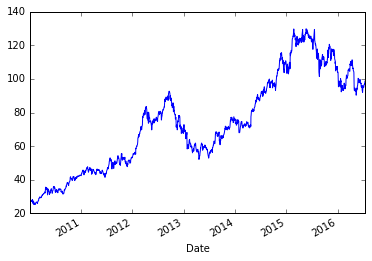

In [7]:
AAPL['Adj Close'].plot()

In [8]:
import numpy as np
log_rets = np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))

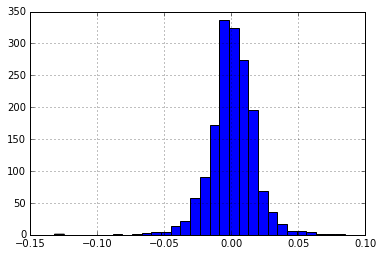

In [9]:
log_rets.hist(bins=30)

In [10]:
import matplotlib.pyplot as plt

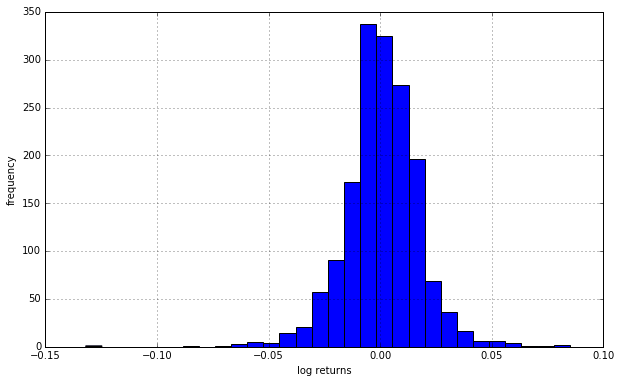

In [11]:
log_rets.hist(figsize=(10, 6), bins=30)
plt.xlabel('log returns')
plt.ylabel('frequency')

## Financial Plots

In [12]:
import matplotlib.finance as mpf

In [13]:
start = (2015, 4, 1)
end = (2015, 5, 30)
quotes = mpf.quotes_historical_yahoo_ochl('^GDAXI', start, end)

In [14]:
quotes[:2]

[(735689.0,
  11902.919921999999,
  12001.379883,
  12112.980469,
  11880.190430000001,
  90437700.0),
 (735690.0,
  11991.620117,
  11967.389648,
  12020.110352,
  11948.830078000001,
  68635700.0)]

[None, None, None, None, None, None, None, None]

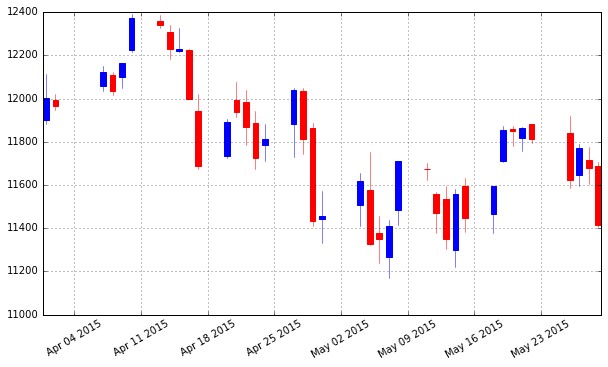

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
mpf.candlestick_ochl(ax, quotes, width=0.6, colorup='b', colordown='r')
plt.grid(True)
ax.xaxis_date()
# dates on the x-axis
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=30)

[None, None, None, None, None, None, None, None, None, None]

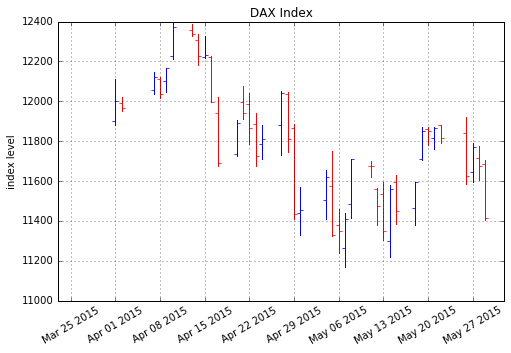

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
mpf.plot_day_summary_oclh(ax, quotes, colorup='b', colordown='r')
plt.grid(True)
ax.xaxis_date()
plt.title('DAX Index')
plt.ylabel('index level')
plt.setp(plt.gca().get_xticklabels(), rotation=30)

## ggplot Style Plotting

In [21]:
plt.style.use('ggplot')

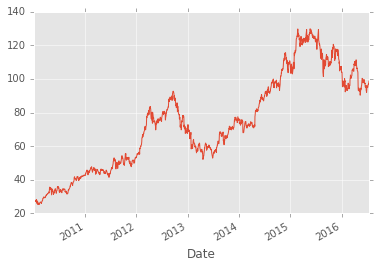

In [22]:
AAPL['Adj Close'].plot()

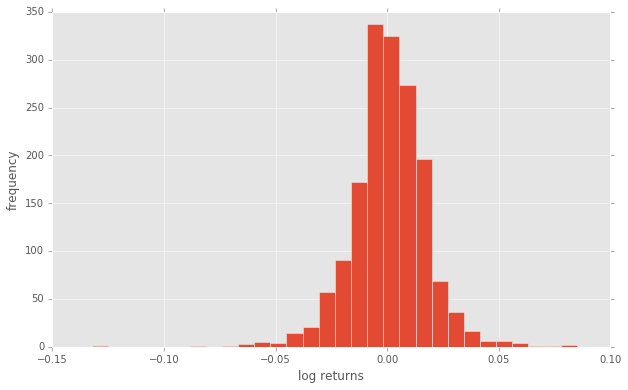

In [23]:
log_rets.hist(figsize=(10, 6), bins=30)
plt.xlabel('log returns')
plt.ylabel('frequency')

### seaborn for Statistical Plotting

In [24]:
import seaborn as sns
sns.set()

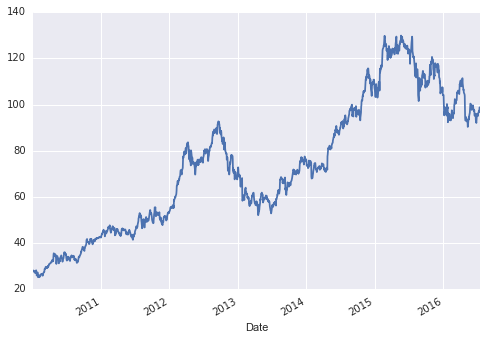

In [25]:
AAPL['Adj Close'].plot()

[None, None, None, None, None, None, None, None]

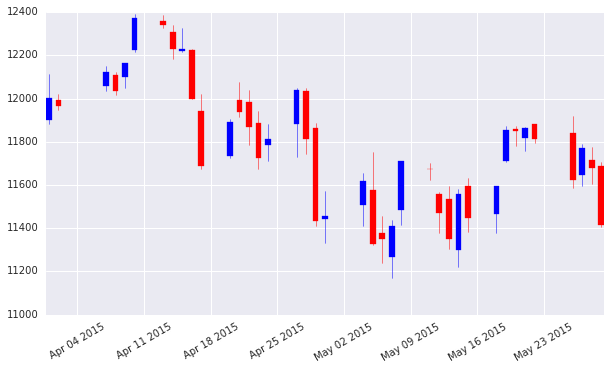

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
mpf.candlestick_ochl(ax, quotes, width=0.6, colorup='b', colordown='r')
plt.grid(True)
ax.xaxis_date()
# dates on the x-axis
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [27]:
import pandas as pd
AAPL['42d'] = pd.rolling_mean(AAPL['Adj Close'], 42)
AAPL['252d'] = pd.rolling_mean(AAPL['Adj Close'], 200)
  # 42 & 252 days trends (moving averages)

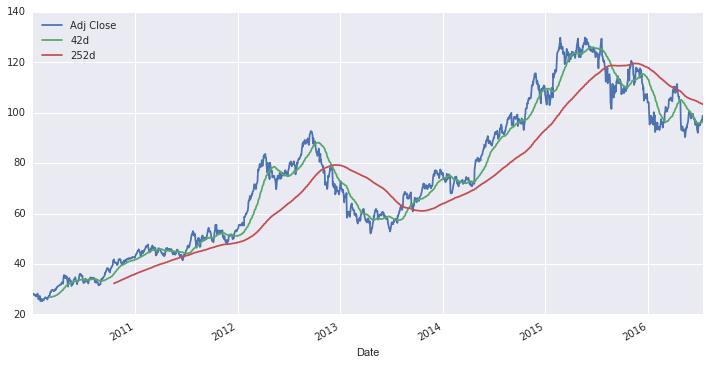

In [28]:
AAPL[['Adj Close', '42d', '252d']].plot(figsize=(12, 6))

In [29]:
MSFT = web.DataReader('MSFT', data_source='yahoo')

In [30]:
data = pd.DataFrame({'AAPL': AAPL['Adj Close'], 'MSFT': MSFT['Adj Close']})
data.tail() 

,AAPL,MSFT
Date,,
2016-07-11,96.980003,52.590000
2016-07-12,97.419998,53.209999
2016-07-13,96.870003,53.509998
2016-07-14,98.790001,53.740002
2016-07-15,98.779999,53.700001


In [31]:
import numpy as np
rets = np.log(data / data.shift(1))
rets.tail()

,AAPL,MSFT
Date,,
2016-07-11,0.003098,0.005530
2016-07-12,0.004527,0.011720
2016-07-13,-0.005662,0.005622
2016-07-14,0.019626,0.004289
2016-07-15,-0.000101,-0.000745


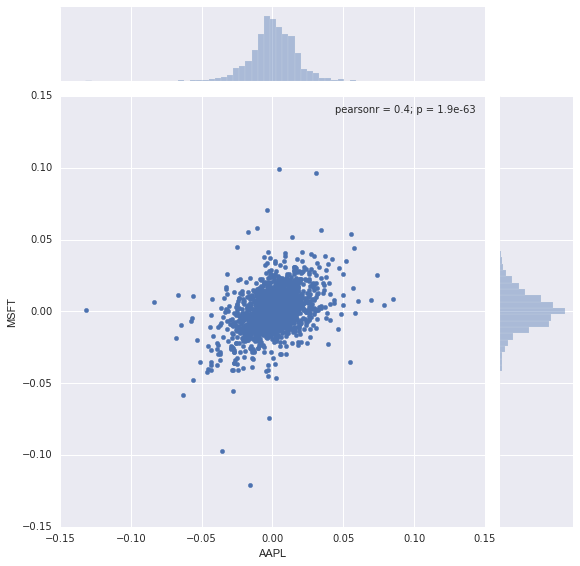

In [32]:
sns.jointplot(rets['AAPL'], rets['MSFT'], size=8)

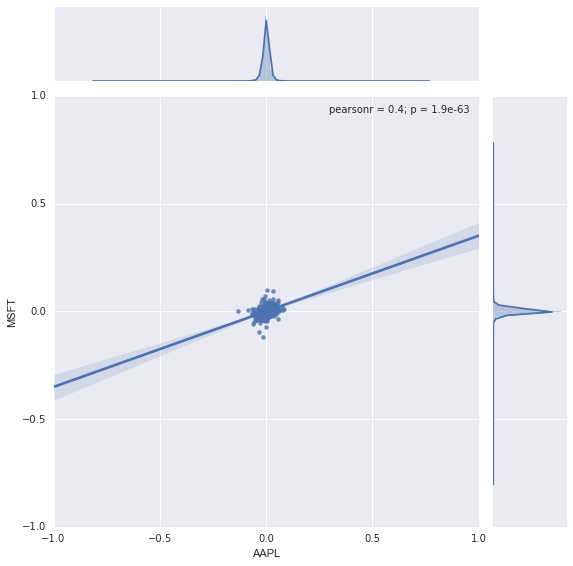

In [33]:
sns.jointplot(rets['AAPL'], rets['MSFT'], size=8, kind='reg')

### Interactive Plotting with plotly

In [40]:
import plotly.plotly as py
import cufflinks
py.sign_in('Python-Demo-Account', 'gwt101uhh0')

In [41]:
AAPL[['Adj Close', '42d', '252d']].iplot(filename='plotly',
                                         world_readable=True)

In [42]:
AAPL['Adj Close'].iplot(filename='AAPL_fit', bestfit=True, colors=['pink'],
                bestfit_colors=['blue'], world_readable=True)

## Interacting & Plotting with R & ggplot

In [45]:
%load_ext rpy2.ipython

In [46]:
aapl = AAPL['Adj Close'].values

In [47]:
%Rpush aapl

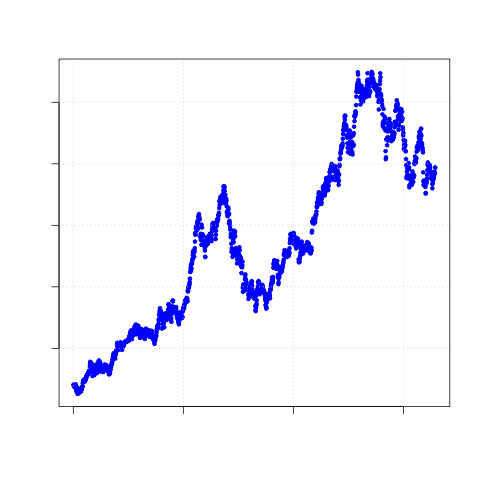

In [48]:
%R plot(aapl, pch=20, col='blue'); grid(); title("Apple Stock Prices")

In [49]:
%R x = seq(1, length(aapl), by=1)

array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
         1.64300000e+03,   1.64400000e+03,   1.64500000e+03])

In [50]:
%R c = coef(lm(aapl ~ x))

array([ 29.1724762 ,   0.05399742])

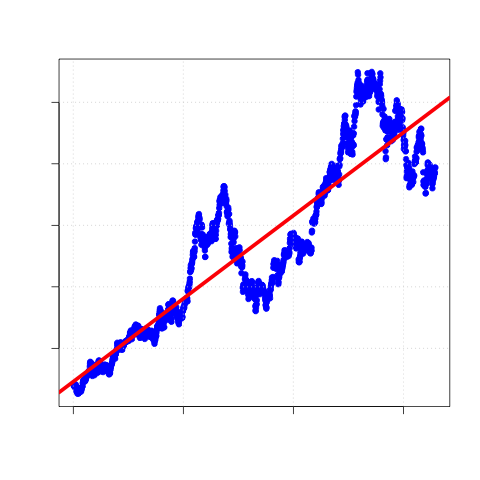

In [51]:
%%R
plot(aapl, pch=19, col='blue')
grid(); abline(c, col='red', lwd=5)
title('Stock Prices with Regression Line')

In [52]:
%R m = mean(aapl)

array([ 73.61235401])

In [53]:
%Rpull m

In [54]:
print("Average stock price is %5.2f" % m[0])

Average stock price is 73.61


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@pqp.io">team@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**datapark.io** |
<a href="http://datapark.io">http://datapark.io</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>